In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

## Загрузка DF и общая информация о нем

In [313]:
data = pd.read_csv('movie_bd_v5.csv', encoding = "utf-8")
# encoding
data.director = data.director.str.encode('latin1').str.decode('utf8') # worked for "director" column

In [314]:
print(data.shape)
data.head()

(1889, 14)


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015
4,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015


In [315]:
data.dtypes

imdb_id                  object
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
dtype: object

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [317]:
data.isna().sum()

imdb_id                 0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

In [318]:
data.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year'],
      dtype='object')

In [319]:
# добавим тысячный разделитель
data["budget"] = data.budget.astype("float64")
data["revenue"] = data.revenue.astype("float64")
pd.set_option("display.float_format", "{:,}".format)
data.head()

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,"150,000,000.0","1,513,528,810.0",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,tt1392190,"150,000,000.0","378,436,354.0",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,tt2908446,"110,000,000.0","295,238,201.0",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015
3,tt2488496,"200,000,000.0","2,068,178,225.0",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015
4,tt2820852,"190,000,000.0","1,506,249,360.0",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015


# Предобработка

In [320]:
answers = {} # создадим словарь для ответов

### Уберем ненужные колонки

In [321]:
data_new = data.drop(columns=["imdb_id", "tagline"])

### Переводим дату в datetime формат

In [322]:
data_new["release_date"] = pd.to_datetime(data_new["release_date"])

### Добавляем колонку release_month

In [323]:
data_new["release_month"] = data_new["release_date"].dt.month

### Добавим колонку release_weekday

In [327]:
def weekday(wd):
    if wd == 0:
        return "Mon"
    elif wd == 1:
        return "Tue"
    elif wd == 2:
        return "Wed"
    elif wd == 3:
        return "Thu"
    elif wd == 4:
        return "Fri"
    elif wd == 5:
        return "Sat"
    return "Sun"

data_new["release_weekday_n"] = data_new.release_date.dt.weekday

data_new["release_weekday"] = data_new.release_weekday_n.apply(weekday)

data_new = data_new.drop("release_weekday_n", axis=1)

### Добавляем колонку profit = revenue - budget

In [335]:
data_new["profit"] = data_new["revenue"] - data["budget"]
data_new.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'release_month', 'release_weekday',
       'profit'],
      dtype='object')

### Упорядочим колонки

In [341]:
cols = data_new.columns.tolist()
cols = [cols[2]] + cols[:2] + [cols[-1]] + [cols[-5]] + cols[3:-5] + cols[-4:-1]
print(cols)

['original_title', 'budget', 'revenue', 'profit', 'vote_average', 'cast', 'director', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'release_year', 'release_month', 'release_weekday']


In [423]:
data_new = data_new[cols]

### Извлечем информацию о жанрах для каждой картины

In [343]:
# сперва строки в колонке genres преобразуем в списки
data_new.genres = data_new.genres.apply(lambda x: x.split("|"))

# альтернативный метод без использования функции: метод assign
# data_new = data_new.assign(genres=data_new.genres.str.split('|'))

# применим метод explode, чтобы каждой строке соответствовал только один жанр
data_gen = data_new.explode("genres", ignore_index=True)

In [344]:
# смотрим, что получилось
data_gen.head(6)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
0,Jurassic World,"150,000,000.0","1,513,528,810.0","1,363,528,810.0",6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,6,Tue
1,Jurassic World,"150,000,000.0","1,513,528,810.0","1,363,528,810.0",6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,6,Tue
2,Jurassic World,"150,000,000.0","1,513,528,810.0","1,363,528,810.0",6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,6,Tue
3,Jurassic World,"150,000,000.0","1,513,528,810.0","1,363,528,810.0",6.5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,6,Tue
4,Mad Max: Fury Road,"150,000,000.0","378,436,354.0","228,436,354.0",7.1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,5,Wed
5,Mad Max: Fury Road,"150,000,000.0","378,436,354.0","228,436,354.0",7.1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,5,Wed


### Извлечем информацию об режиссерах для каждой картины

In [345]:
data_new = data_new.assign(director=data_new.director.str.split('|'))

In [346]:
data_dir = data_new.explode("director", ignore_index=True)

### ... о студиях

In [347]:
data_new = data_new.assign(production_companies=data_new.production_companies.str.split('|'))
data_comp = data_new.explode("production_companies", ignore_index=True)

### ... и об актерах

In [348]:
data_new = data_new.assign(cast=data_new.cast.str.split('|'))
data_cast = data_new.explode("cast", ignore_index=True)

### Для вопроса 14: Оставим только фильмы с жанром Action

In [349]:
data_dir.genres = data_dir.genres.apply(lambda x: "|".join(x))

In [350]:
data_dir_action = data_dir[data_dir.genres.str.contains("Action")]

### Для вопроса 17: Оставим только фильмы, где снимался N.Cage

In [351]:
data_gen_cage = data_gen[data_gen.cast.str.contains("Nicolas Cage")]

In [352]:
data_gen_cage.shape

(93, 15)

### Для вопроса 24: Добавим столбец для количества символов в названии фильма

In [353]:
data_comp["title_len"] = data_comp.original_title.apply(lambda x: len(x))

### Для вопроса 25: Добавим столбец для количества слов в описании фильма

In [354]:
data_comp["overview_len"] = data_comp.overview.apply(lambda x: len(x.split()))

In [355]:
data_comp.shape

(6078, 17)

### Для вопроса 27

In [356]:
# Будем работать с серией data["cast"]
data_cast_ser = data.cast

In [357]:
# Преобразуем строки в множества
data_cast_ser = data_cast_ser.apply(lambda x: set(x.split("|")))

In [358]:
# С помощью функции combinations из библиотеки itertools сравним множества, найдем их пересечения 
# и поместим эти пересечения в список
lst = []
for set1, set2 in itertools.combinations(data_cast_ser, 2):
    lst.append(set1.intersection(set2))
    
    

In [359]:
# Создадим новую серию из полученного списка
data_cast_ser_int = pd.Series(lst)

# Почистим новую серию: уберем пустые множества, а также множества с одним элементом
data_cast_ser_int = data_cast_ser_int.apply(lambda x: x if len(x) > 1 else np.NaN).dropna()


In [360]:
# В новой серии остались множества с двумя и более актерами, снимавшихся в двух и более фильмах вместе
data_cast_ser_int.head(10)

3903     {Kate Winslet, Shailene Woodley, Theo James, M...
3949                      {Shailene Woodley, Ansel Elgort}
7879         {Paul Walker, Michelle Rodriguez, Vin Diesel}
8117         {Paul Walker, Michelle Rodriguez, Vin Diesel}
8392             {Paul Walker, Vin Diesel, Dwayne Johnson}
8838             {Paul Walker, Vin Diesel, Dwayne Johnson}
9794                        {Tom Hardy, Leonardo DiCaprio}
19798                        {Ralph Fiennes, Daniel Craig}
24521                          {Adam Sandler, Kevin James}
25475                          {Adam Sandler, Kevin James}
dtype: object

# 1. У какого фильма из списка самый большой бюджет?

In [362]:
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides'

In [363]:
data_new[data_new.budget == data_new.budget.max()].original_title

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

##### ВАРИАНТ 2

In [364]:
data_new.sort_values("budget", ascending=False).head(3)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
723,Pirates of the Caribbean: On Stranger Tides,"380,000,000.0","1,021,683,000.0","641,683,000.0",6.3,"[Johnny Depp, PenÃ©lope Cruz, Geoffrey Rush, I...",[Rob Marshall],Captain Jack Sparrow crosses paths with a woma...,136,"[Adventure, Action, Fantasy]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2011-05-11,2011,5,Wed
1669,Pirates of the Caribbean: At World's End,"300,000,000.0","961,000,000.0","661,000,000.0",6.8,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha...",169,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,2007,5,Sat
14,Avengers: Age of Ultron,"280,000,000.0","1,405,035,767.0","1,125,035,767.0",7.4,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],When Tony Stark tries to jumpstart a dormant p...,141,"[Action, Adventure, Science Fiction]","[Marvel Studios, Prime Focus, Revolution Sun S...",2015-04-22,2015,4,Wed


# 2. Какой фильм самый продолжительный?

In [366]:
answers['2'] = 'Gods and Generals'

In [367]:
data_new.sort_values("runtime", ascending=False).head(3)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
1157,Gods and Generals,"56,000,000.0","12,923,936.0","-43,076,064.0",5.8,"[Stephen Lang, Jeff Daniels, Robert Duvall, Ke...",[Ronald F. Maxwell],The film centers mostly around the personal an...,214,"[Drama, History, War]","[Turner Pictures, Antietam Filmworks]",2003-02-21,2003,2,Fri
1081,The Lord of the Rings: The Return of the King,"94,000,000.0","1,118,888,979.0","1,024,888,979.0",7.9,"[Elijah Wood, Ian McKellen, Viggo Mortensen, L...",[Peter Jackson],Aragorn is revealed as the heir to the ancient...,201,"[Adventure, Fantasy, Action]","[WingNut Films, New Line Cinema]",2003-12-01,2003,12,Mon
1736,Grindhouse,"67,000,000.0","25,037,897.0","-41,962,103.0",6.5,"[Kurt Russell, ZoÃ« Bell, Rosario Dawson, Vane...","[Robert Rodriguez, Eli Roth, Quentin Tarantino...",Two full length feature horror movies written ...,191,"[Thriller, Action, Horror]","[Big Talk Productions, Yer Dead Productions, W...",2007-04-06,2007,4,Fri


# 3. Какой из фильмов самый короткий (в минутах)?





In [368]:
answers['3'] = 'Winnie the Pooh'

In [369]:
data_new[data_new.runtime == data_new.runtime.min()].original_title

768    Winnie the Pooh
Name: original_title, dtype: object

# 4. Какова средняя длительность фильмов?


In [370]:
answers['4'] = '110'

In [371]:
print(data_new.runtime.mean().round())

110.0


#### 4.1. График распределения продолжительности картин

C:\Users\artke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

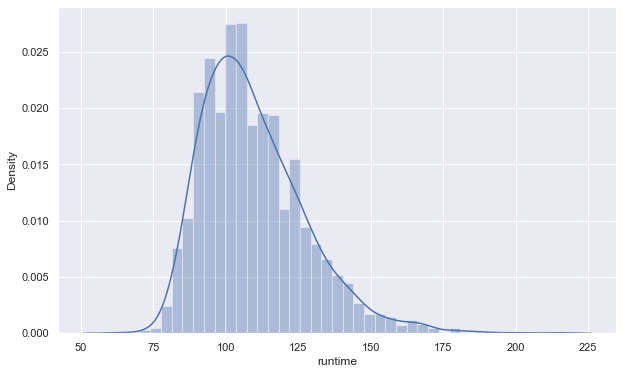

In [446]:
sns.distplot(data_new["runtime"])

<AxesSubplot:ylabel='Frequency'>

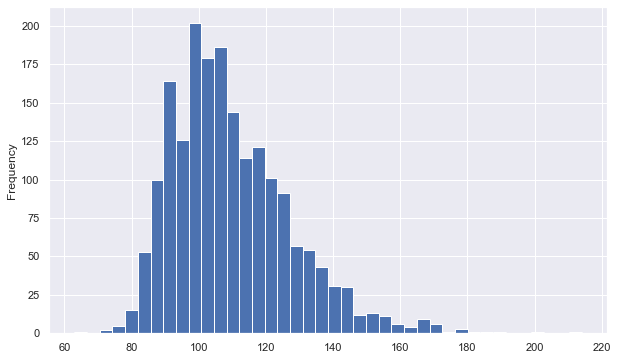

In [448]:
data_new["runtime"].plot(kind="hist", bins=40, grid=True)

# 5. Каково медианное значение длительности фильмов? 

In [374]:
answers['5'] = '107'

In [375]:
data_new.runtime.median()

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [376]:
answers['6'] = 'Avatar'

In [377]:
data_new.sort_values("profit", ascending = False).head(3)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
239,Avatar,"237,000,000.0","2,781,505,847.0","2,544,505,847.0",7.1,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2009,12,Thu
3,Star Wars: The Force Awakens,"200,000,000.0","2,068,178,225.0","1,868,178,225.0",7.5,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,2015,12,Tue
0,Jurassic World,"150,000,000.0","1,513,528,810.0","1,363,528,810.0",6.5,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,2015,6,Tue


#### 6.1. График: 10 самых прибыльных фильмов

<AxesSubplot:xlabel='profit', ylabel='original_title'>

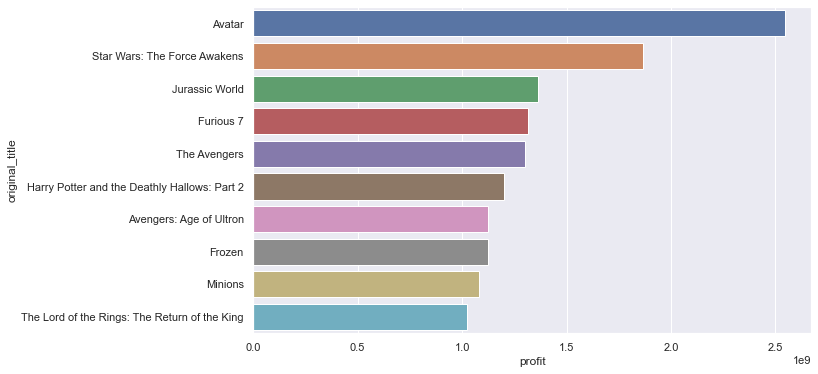

In [378]:
data_new_success = data_new[data_new.profit > 0].groupby("original_title").profit.sum().sort_values(ascending=False)[:10]
data_new_success = pd.DataFrame(data_new_success)
data_new_success["idx"] = range(10)

data_new_success["original_title"] = data_new_success.index
data_new_success = data_new_success.set_index("idx")

sns.barplot(x="profit", y="original_title", data=data_new_success)

# Хочешь заработать - найми режиссером Кэмерона

# 7. Какой фильм самый убыточный? 

In [379]:
answers['7'] = 'The Lone Ranger'

In [380]:
data_new[data_new.profit == data_new.profit.min()]

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
1245,The Lone Ranger,"255,000,000.0","89,289,910.0","-165,710,090.0",6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...",[Gore Verbinski],The Texas Rangers chase down a gang of outlaws...,149,"[Action, Adventure, Western]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2013-07-03,2013,7,Wed


#### 7.1. График: 10 самых убыточных фильмов

<AxesSubplot:xlabel='profit', ylabel='original_title'>

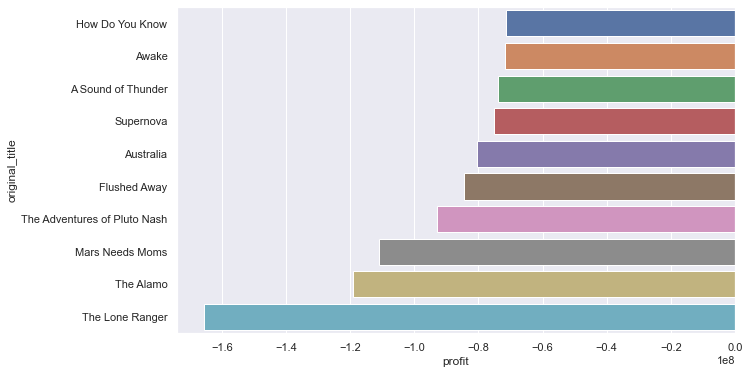

In [381]:
data_new_fail = data_new[data_new.profit < 0].groupby("original_title").profit.sum().sort_values()[:10]
data_new_fail.sort_values(ascending=False, inplace=True)
data_new_fail = pd.DataFrame(data_new_fail)
data_new_fail["idx"] = range(10)

data_new_fail["original_title"] = data_new_fail.index
data_new_fail = data_new_fail.set_index("idx")

sns.barplot(x="profit", y="original_title", data=data_new_fail)

# Одинокий Ренжер лидирует с солидным отрывом...

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [382]:
answers['8'] = '1478'

In [383]:
data_new[data_new.revenue > data_new.budget].original_title.count()

1478

##### ВАРИАНТ 2

In [384]:
data_new.query("revenue > budget").original_title.count()

1478

##### ВАРИАНТ 3

In [385]:
data_new[lambda x: x["revenue"] > x["budget"]].original_title.count()

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [386]:
answers['9'] = 'The Dark Knight'

In [387]:
data_new[data_new.release_year == 2008].sort_values("revenue", ascending=False).head(3)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
599,The Dark Knight,"185,000,000.0","1,001,921,825.0","816,921,825.0",8.1,"[Christian Bale, Michael Caine, Heath Ledger, ...",[Christopher Nolan],Batman raises the stakes in his war on crime. ...,152,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Warner Bros., ...",2008-07-16,2008,7,Wed
603,Indiana Jones and the Kingdom of the Crystal S...,"185,000,000.0","786,636,033.0","601,636,033.0",5.6,"[Harrison Ford, Cate Blanchett, Shia LaBeouf, ...",[Steven Spielberg],"Set during the Cold War, the Soviets â€“ led b...",122,"[Adventure, Action]","[Lucasfilm, Paramount Pictures]",2008-05-21,2008,5,Wed
606,Kung Fu Panda,"130,000,000.0","631,744,560.0","501,744,560.0",6.8,"[Jack Black, Dustin Hoffman, Angelina Jolie, J...","[Mark Osborne, John Stevenson]","When the Valley of Peace is threatened, lazy P...",90,"[Animation, Family]",[DreamWorks Animation],2008-06-04,2008,6,Wed


#### 9.1. График количества снятых фильмов по годам

<AxesSubplot:>

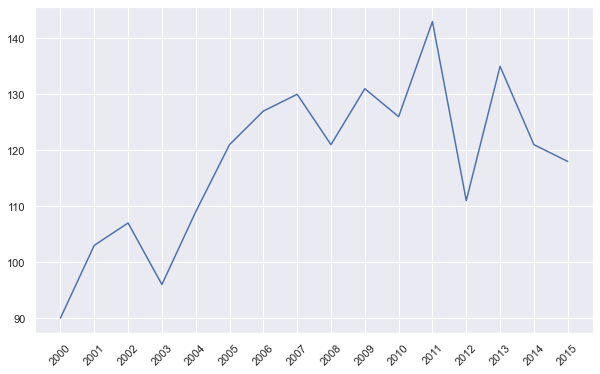

In [388]:
years = range(2000, 2016)
data_new.release_year.value_counts().sort_index().plot(grid=True, xticks=years, rot=45)

# Предположу, что во время фин кризиса снимали меньше, что повлияло на количество вышедших картин в 2012

#### 9.2. График суммарных кассовых сборов по годам

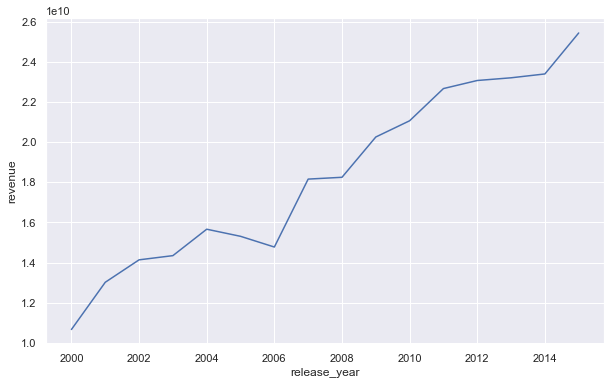

In [389]:
sns.set(rc={'figure.figsize':(10,6)})
data_annual_rev = data_new.groupby("release_year")["revenue"].sum()
ax = sns.lineplot(data = data_annual_rev, ci=None, markers=True)

# Согласно данным из нашего датасета суммарные сборы неуклонно растут год от года, за единственным исключением
# в 2006 году (см. 10.1)

#### 9.3. График кассовых сборов по годам и по самым популярным жанрам

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

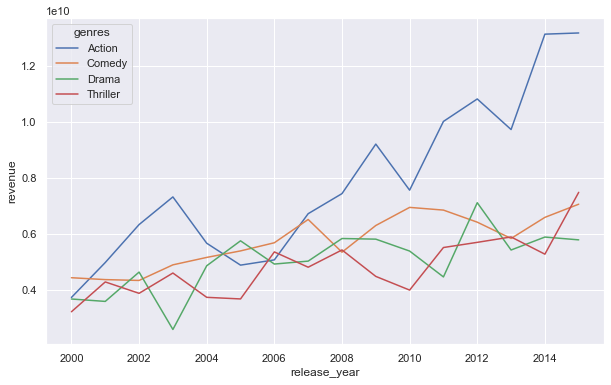

In [390]:
data_gen_top = data_gen[data_gen.genres.isin(["Drama", "Comedy", "Thriller", "Action"])].groupby(["release_year", "genres"]).revenue.sum()
data_gen_top = pd.DataFrame(data_gen_top)
sns.lineplot(x='release_year', y='revenue', data = data_gen_top, hue="genres", ci=None, markers=True)

# Охотнее всего идут на фильмы в жанре Action

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [391]:
answers['10'] = 'The Lone Ranger'

In [392]:
data_new.query("2012 <= release_year <= 2014").sort_values("profit").head(3)

,original_title,budget,revenue,profit,vote_average,cast,director,overview,runtime,genres,production_companies,release_date,release_year,release_month,release_weekday
1245,The Lone Ranger,"255,000,000.0","89,289,910.0","-165,710,090.0",6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...",[Gore Verbinski],The Texas Rangers chase down a gang of outlaws...,149,"[Action, Adventure, Western]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2013-07-03,2013,7,Wed
1214,R.I.P.D.,"130,000,000.0","61,648,500.0","-68,351,500.0",5.3,"[Jeff Bridges, Ryan Reynolds, Kevin Bacon, Ste...",[Robert Schwentke],A recently slain cop joins a team of undead po...,96,"[Fantasy, Action, Comedy, Crime]","[Universal Pictures, Original Film, Dark Horse...",2013-07-18,2013,7,Thu
1007,Upside Down,"60,000,000.0","8,106,475.0","-51,893,525.0",6.1,"[Kirsten Dunst, Jim Sturgess, Timothy Spall, J...",[Juan Diego Solanas],In an alternate universe where twinned worlds ...,104,"[Romance, Science Fiction, Drama, Fantasy]","[Onyx Films, Studio 37, Jouror Productions, Fr...",2012-09-27,2012,9,Thu


#### 10.1. График: количество убыточных фильмов по годам

<AxesSubplot:xlabel='release_year'>

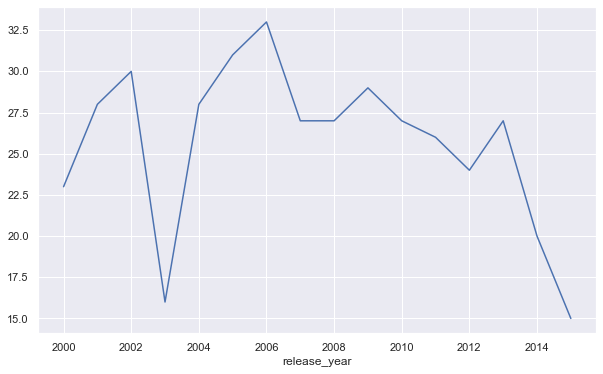

In [393]:
data_new[data_new.profit < 0].groupby("release_year").original_title.count().plot()

# 2006 год выдался богатым на неудачные фильмы

# 11. Какого жанра фильмов больше всего?

In [394]:
answers['11'] = 'Drama'

In [395]:
data_gen.genres.value_counts()

Drama              782
Comedy             683
Thriller           596
Action             582
Adventure          415
Crime              315
Romance            308
Family             260
Science Fiction    248
Fantasy            222
Horror             176
Mystery            168
Animation          139
Music               64
History             62
War                 58
Western             19
Documentary          8
Foreign              2
Name: genres, dtype: int64

#### 11.1. График самых популярных жанров

<AxesSubplot:>

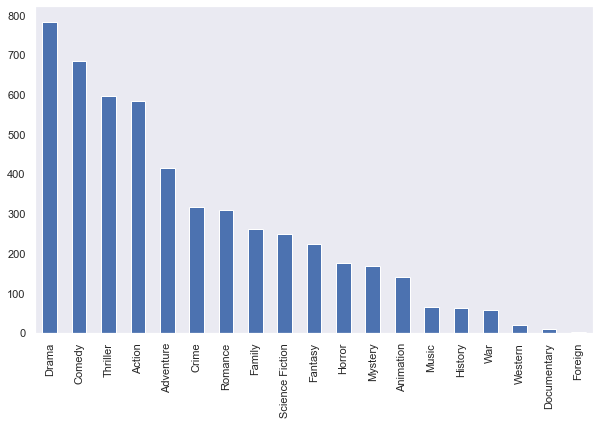

In [396]:
data_gen.genres.value_counts().plot(kind="bar", grid=False)

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [397]:
answers['12'] = 'Drama'

In [398]:
data_gen[data_gen.profit > 0].genres.value_counts()

Drama              560
Comedy             551
Thriller           446
Action             444
Adventure          337
Romance            242
Crime              231
Family             226
Science Fiction    195
Fantasy            188
Horror             150
Animation          120
Mystery            119
Music               47
History             46
War                 41
Western             12
Documentary          7
Name: genres, dtype: int64

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [399]:
answers['13'] = 'Peter Jackson'

In [400]:
data_dir.groupby("director")["revenue"].sum().sort_values().tail(3)

director
David Yates         4,154,295,625.0
Christopher Nolan   4,167,548,502.0
Peter Jackson       6,490,593,685.0
Name: revenue, dtype: float64

#### 13.1. График самых "кассовых" режиссеров

<AxesSubplot:xlabel='revenue', ylabel='director'>

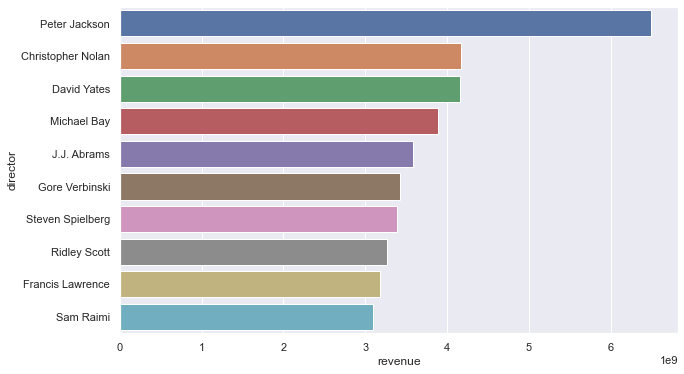

In [401]:
data_dir_rev = data_dir.groupby("director")["revenue"].sum().sort_values(ascending=False)[:10]
data_dir_rev = pd.DataFrame(data_dir_rev)
data_dir_rev["idx"] = range(10)
data_dir_rev["director"] = data_dir_rev.index
data_dir_rev = data_dir_rev.set_index("idx")

sns.barplot(x="revenue", y="director", data=data_dir_rev)

#### 13.2. График самых "прибыльных" режиссеров

<AxesSubplot:xlabel='profit', ylabel='director'>

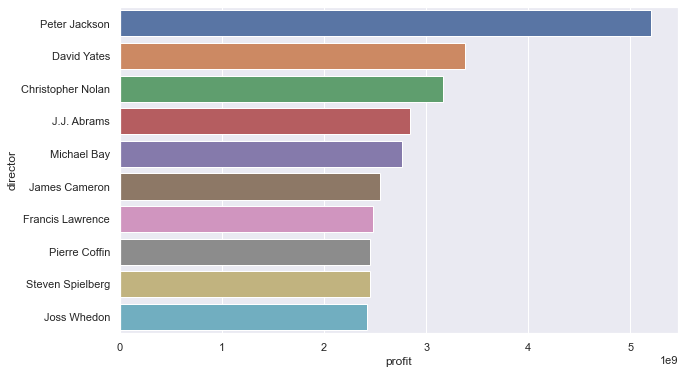

In [402]:
data_dir_prof = data_dir.groupby("director")["profit"].sum().sort_values(ascending=False).head(10)
data_dir_prof = pd.DataFrame(data_dir_prof)
data_dir_prof["idx"] = range(10)
data_dir_prof["director"] = data_dir_prof.index
data_dir_prof = data_dir_prof.set_index("idx")

sns.barplot(x="profit", y="director", data=data_dir_prof)

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [403]:
answers['14'] = 'Robert Rodriguez'

In [404]:
data_dir_action.director.value_counts().head()

Robert Rodriguez      9
Michael Bay           7
Paul W.S. Anderson    7
Ridley Scott          6
Antoine Fuqua         6
Name: director, dtype: int64

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [405]:
answers['15'] = 'Chris Hemsworth'

In [406]:
data_cast[data_cast.release_year == 2012].groupby("cast")["revenue"].sum().sort_values(ascending=False).head()

cast
Chris Hemsworth     2,027,450,773.0
Denis Leary         1,629,460,639.0
Anne Hathaway       1,522,851,057.0
Chris Evans         1,519,557,910.0
Robert Downey Jr.   1,519,557,910.0
Name: revenue, dtype: float64

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [407]:
answers['16'] = 'Matt Damon'

In [408]:
# высокобюджетный: revenue > revenue.mean()
data_cast[data_cast.budget > data_cast.budget.mean()].groupby("cast")["original_title"].count().sort_values(ascending=False).head()

cast
Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Eddie Murphy         15
Samuel L. Jackson    15
Name: original_title, dtype: int64

#### 16.1. График самых часто снимающихся актеров


<AxesSubplot:>

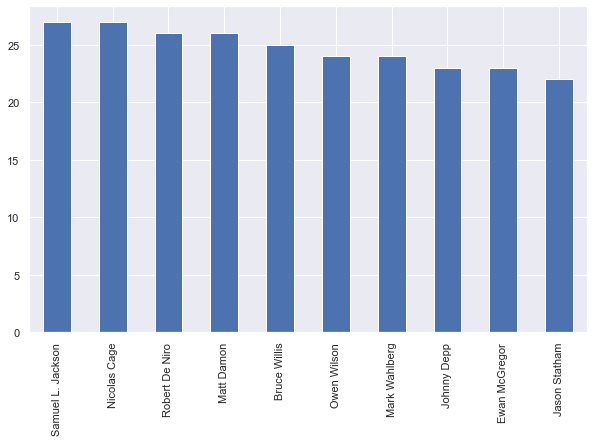

In [429]:
data_cast_freq = data_cast.cast.value_counts().sort_values(ascending=False).head(10)
data_cast_freq.plot(kind="bar")

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [258]:
answers['17'] = 'Action'

In [259]:
data_gen_cage.genres.value_counts()

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Family              3
Mystery             3
Animation           3
History             2
Romance             1
Horror              1
War                 1
Name: genres, dtype: int64

# 18. Самый убыточный фильм от Paramount Pictures

In [260]:
answers['18'] = 'K-19: The Widowmaker'

In [261]:
data_comp[data_comp.production_companies == "Paramount Pictures"].groupby("original_title")["profit"].sum().sort_values()

original_title
K-19: The Widowmaker                                 -64,831,034.0
Timeline                                             -60,519,261.0
Next                                                 -51,788,987.0
Alfie                                                -46,604,061.0
Twisted                                              -24,805,000.0
                                                          ...     
Mission: Impossible - Ghost Protocol                 549,713,380.0
Transformers                                         559,709,780.0
Indiana Jones and the Kingdom of the Crystal Skull   601,636,033.0
Transformers: Revenge of the Fallen                  686,297,228.0
Transformers: Dark of the Moon                       928,746,996.0
Name: profit, Length: 122, dtype: float64

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [262]:
answers['19'] = '2015'

In [263]:
data_new.groupby("release_year")["revenue"].sum().sort_values(ascending=False).head()

release_year
2015   25,449,202,382.0
2014   23,405,862,953.0
2013   23,213,799,791.0
2012   23,079,001,687.0
2011   22,676,791,872.0
Name: revenue, dtype: float64

# 20. Какой самый прибыльный год для студии Warner Bros?

In [264]:
answers['20'] = '2014'

In [265]:
data_comp[data_comp.production_companies.str.contains("Warner Bros.")].groupby("release_year")["profit"].sum().sort_values(ascending=False).head()

release_year
2014   2,292,949,646.0
2007   2,201,675,217.0
2008   2,134,595,031.0
2010   1,974,712,985.0
2011   1,871,393,682.0
Name: profit, dtype: float64

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [266]:
answers['21'] = 'Сентябрь'

In [267]:
data_new.release_month.value_counts()

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_month, dtype: int64

##### ВАРИАНТ 2

In [268]:
data_new.groupby("release_month")["original_title"].count().sort_values(ascending=False)

release_month
9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: original_title, dtype: int64

#### 21.1. График: количество вышедших фильмов по месяцам

<AxesSubplot:xlabel='release_month'>

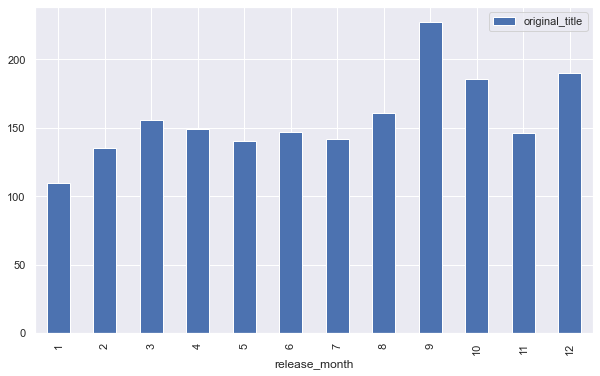

In [433]:
data_month = data_new.groupby("release_month")["original_title"].count().sort_values(ascending=False)
data_month = pd.DataFrame(data_month)

data_month.sort_index().plot(kind="bar")

# Больше фильмов выходит к концу года

#### 21.1. В какой день недели за все годы суммарно вышло больше всего фильмов?

In [434]:
# В какой день недели вышло больше всего фильмов
def weekday(wd):
    if wd == 0:
        return "Mon"
    elif wd == 1:
        return "Tue"
    elif wd == 2:
        return "Wed"
    elif wd == 3:
        return "Thu"
    elif wd == 4:
        return "Fri"
    elif wd == 5:
        return "Sat"
    return "Sun"

data_new["weekday"] = data_new.release_date.dt.weekday

data_new["weekday"] = data_new.weekday.apply(weekday)

In [435]:
df_wd = data_new["weekday"].value_counts()
print(df_wd)

Fri    691
Thu    452
Wed    375
Tue    150
Mon     86
Sat     68
Sun     67
Name: weekday, dtype: int64


<AxesSubplot:>

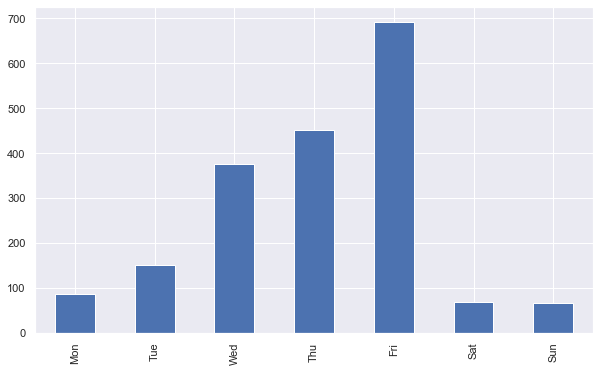

In [436]:
df_wd = pd.DataFrame(df_wd)

df_wd["idx"] = [4,3,2,1,0,5,6]

df_wd = df_wd.sort_values("idx")

df_wd.weekday.plot(kind="bar")

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [274]:
answers['22'] = '450'

In [276]:
data_new[data_new.release_month.isin([6, 7, 8])].original_title.count()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [293]:
answers['23'] = 'Peter Jackson'

In [292]:
data_dir[data_dir.release_month.isin([12, 1, 2])].groupby("director")["original_title"].count().sort_values(ascending=False)[:4]

director
Peter Jackson        7
Steven Soderbergh    6
Clint Eastwood       6
Martin Scorsese      4
Name: original_title, dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [279]:
answers['24'] = 'Four By Two Productions'

In [294]:
data_comp.groupby("production_companies")["title_len"].mean().sort_values(ascending=False)[:5]

production_companies
Four By Two Productions     83.0
Jim Henson Company, The     59.0
Dos Corazones               47.0
Museum Canada Productions   46.0
Polsky Films                46.0
Name: title_len, dtype: float64

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [281]:
answers['25'] = 'Midnight Picture Show'

In [295]:
data_comp.groupby("production_companies")["overview_len"].mean().sort_values(ascending=False).head()

production_companies
Midnight Picture Show              175.0
Room 9 Entertainment               161.0
98 MPH Productions                 159.0
Heineken Branded Entertainment     159.0
Brookwell-McNamara Entertainment   156.0
Name: overview_len, dtype: float64

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [283]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave'

In [284]:
list(data_new.sort_values("vote_average", ascending=False).head(int(0.01*len(data_new)))["original_title"])

['The Dark Knight',
 'Interstellar',
 'The Imitation Game',
 'Inside Out',
 'Room',
 'The Wolf of Wall Street',
 'Gone Girl',
 '12 Years a Slave',
 'Guardians of the Galaxy',
 'The Lord of the Rings: The Return of the King',
 'Memento',
 'Inception',
 'The Pianist',
 'The Grand Budapest Hotel',
 'Her',
 'Spotlight',
 'Big Hero 6',
 'The Fault in Our Stars']

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [285]:
answers['27'] = 'Daniel Radcliffe & Rupert Grint'

In [286]:
data_cast_ser_int.value_counts(ascending=False)

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{Emma Watson, Rupert Grint, Daniel Radcliffe}    25
{Johnny Depp, Helena Bonham Carter}              15
{Owen Wilson, Ben Stiller}                       13
{Adam Sandler, Kevin James}                       8
{Brad Pitt, Julia Roberts}                        5
                                                 ..
{Russell Crowe, Mark Strong}                      1
{Scott Bakula, Matt Damon}                        1
{Simon Pegg, Nick Frost}                          1
{Carla Gugino, Dwayne Johnson}                    1
{Charlize Theron, Guy Pearce}                     1
Length: 401, dtype: int64

In [287]:
# Чтобы jupyter не ругался, можно перевести множества в строки
data_cast_ser_int_str = data_cast_ser_int.apply(lambda x: "|".join(list(x))).value_counts(ascending=False)

In [288]:
data_cast_ser_int_str.head()

Emma Watson|Rupert Grint|Daniel Radcliffe                          25
Johnny Depp|Helena Bonham Carter                                   15
Owen Wilson|Ben Stiller                                            13
Adam Sandler|Kevin James                                            8
Kristen Stewart|Peter Facinelli|Robert Pattinson|Taylor Lautner     5
dtype: int64

#### Примечание к вопросу 27

In [289]:
# Проверим, в скольких фильмах снимались Daniel Radcliffe и Rupert Grint вместе
data_radcliffe_grint = data[(data.cast.str.contains("Daniel Radcliffe")) & (data.cast.str.contains("Rupert Grint"))]
data_radcliffe_grint

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month,profit
242,tt0417741,"250,000,000.0","933,959,197.0",Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,Dark Secrets Revealed,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,2009-07-07,7.3,2009,7,"683,959,197.0"
374,tt0926084,"250,000,000.0","954,305,868.0",Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,David Yates,One Wayâ€¦ One Fateâ€¦ One Hero.,"Harry, Ron and Hermione walk away from their l...",146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,2010-10-17,7.4,2010,10,"704,305,868.0"
497,tt0241527,"125,000,000.0","976,475,550.0",Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,Chris Columbus,Let the Magic Begin.,Harry Potter has lived under the stairs at his...,152,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films,2001-11-16,7.2,2001,11,"851,475,550.0"
722,tt1201607,"125,000,000.0","1,327,817,822.0",Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,7.7,2011,7,"1,202,817,822.0"
864,tt0295297,"100,000,000.0","876,688,482.0",Harry Potter and the Chamber of Secrets,Daniel Radcliffe|Rupert Grint|Emma Watson|Kenn...,Chris Columbus,Hogwarts is back in session.,"Ignoring threats to his life, Harry returns to...",161,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films|MIRACL...,2002-11-13,7.2,2002,11,"776,688,482.0"
1312,tt0330373,"150,000,000.0","895,921,036.0",Harry Potter and the Goblet of Fire,Daniel Radcliffe|Rupert Grint|Emma Watson|Ralp...,Mike Newell,Dark And Difficult Times Lie Ahead.,"Harry starts his fourth year at Hogwarts, comp...",157,Adventure|Fantasy|Family,Patalex IV Productions Limited|Warner Bros.|He...,2005-11-05,7.3,2005,11,"745,921,036.0"
1560,tt0304141,"130,000,000.0","789,804,554.0",Harry Potter and the Prisoner of Azkaban,Daniel Radcliffe|Rupert Grint|Emma Watson|Gary...,Alfonso Cuarón,Something wicked this way comes.,"Harry, Ron and Hermione return to Hogwarts for...",141,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films|P of A...,2004-05-31,7.4,2004,5,"659,804,554.0"
1670,tt0373889,"150,000,000.0","938,212,738.0",Harry Potter and the Order of the Phoenix,Daniel Radcliffe|Rupert Grint|Emma Watson|Mich...,David Yates,Evil Must Be Confronted.,Returning for his fifth year of study at Hogwa...,138,Adventure|Fantasy|Family|Mystery,Cool Music|Warner Bros.|Heyday Films|Harry Pot...,2007-06-28,7.2,2007,6,"788,212,738.0"


##### Рэдклиф и Гринт снимались вместе в 8 экранизациях романов Дж.Роулинг о Гарри Поттере.
##### Тогда откуда число 25 в наших результатах? 
##### Функция "combinations('ABCD', 2)" возвращает все парные, неповторяющиеся комбинации для заданных элеметов
##### В случае с n=8 элементов, должно быть 8! / 2! / (8-2)! = 28 комбинаций.
##### Мне не удалось выяснить, куда исчезли три комбинации из моих результатов...
##### К счастью, это не повлияло на правильность ответа.

# Submission

In [296]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': 'Pirates of the Caribbean: On Stranger Tides',
 '2': 'Gods and Generals',
 '3': 'Winnie the Pooh',
 '4': '110',
 '5': '107',
 '6': 'Avatar',
 '7': 'The Lone Ranger',
 '8': '1478',
 '9': 'The Dark Knight',
 '10': 'The Lone Ranger',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': 'K-19: The Widowmaker',
 '19': '2015',
 '20': '2014',
 '21': 'Сентябрь',
 '22': '450',
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': 'Inside Out, The Dark Knight, 12 Years a Slave',
 '27': 'Daniel Radcliffe & Rupert Grint'}

In [291]:
# и убедиться что ни чего не пропустил)
len(answers)

27

## Корреляция

In [437]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = data_new.select_dtypes(include=numerics)
df_num.columns

Index(['budget', 'revenue', 'profit', 'vote_average', 'runtime',
       'release_year', 'release_month'],
      dtype='object')

In [442]:
df_corr = df_num[["vote_average", "budget", "revenue", "profit", "runtime"]].corr().round(4)
df_corr

,vote_average,budget,revenue,profit,runtime
vote_average,1.0,0.1137,0.2977,0.3189,0.4409
budget,0.1137,1.0,0.7156,0.5737,0.3435
revenue,0.2977,0.7156,1.0,0.9827,0.3128
profit,0.3189,0.5737,0.9827,1.0,0.2757
runtime,0.4409,0.3435,0.3128,0.2757,1.0


<AxesSubplot:>

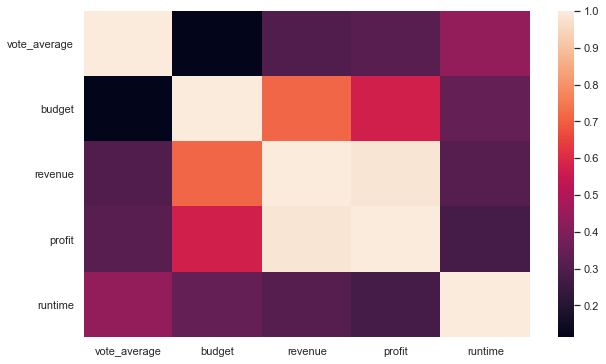

In [443]:
sns.heatmap(df_corr)